# Classification Engines

In contrast to prediction engines the other category of great interest in machine learning is classification.

Computers are mostly calculators; They are very very fast at doing arithmetic. This feature is great for doing tasks that match what a calculator does: summing numbers to work out sales, applying percentages to work out tax, plotting graphs of existing data, solving [tractrix](https://mathworld.wolfram.com/Tractrix.html) equations to create smoking holes in the ocean where there used be an aircraft carrier.  Even watching TV or streaming music through your computer doesn’t involve much more than the computer executing simple arithmetic instructions repeatedly. 
Reconstructing a video frame from the ones and zeros that are piped across the internet to your computer is done using arithmetic not much more complex than the sums we did in grade school.  
Adding up numbers really quickly  thousands, or even millions of times a second  may be impressive  but it isn’t intelligence. 

A human may find it hard to do large sums very quickly but the  process of doing it doesn’t require much intelligence at all (the size of the federal government, and number of elected officials is a testament to this fact). It simply requires an ability to follow  very basic instructions, and this is what the electronics inside a computer does.  Now let’s flips things and turn the tables on computers!  Look at the following images and see if you can recognise what they contain:

![](http://54.243.252.9/engr-1330-webroot/1-Lessons/Lesson22/pictures.png)

You can immediately recognize people, a cat, and a tree -- you are able to classify the pictures very fast.
We can process the quite large amount of information that the images contain, and very  successfully process it to recognise what’s in the image. This kind of task isn’t easy for computers  in fact it’s incredibly difficult. 

Consider what happens when we reduce the information into a 27X27 pixel map to see one reason why classification is hard for a machine -- a resolution issue, also we will see how at reduce resolution the pictures look alike.  First some image processing libraries:

In [2]:
import numpy              # useful numerical routines
import scipy.special      # special functions library
import scipy.misc         # image processing code
import imageio            # image processing library
import matplotlib.pyplot  # import plotting routines

Here's the files containing the images if you want to try this at home

[people784.png](http://54.243.252.9/ce-5319-webroot/ce5319jb/lessons/lesson4/people784.png)<br>
[cat784.png](http://54.243.252.9/ce-5319-webroot/ce5319jb/lessons/lesson4/cat784.png)<br>
[tree784.png](http://54.243.252.9/ce-5319-webroot/ce5319jb/lessons/lesson4/tree784.png)<br>

Now we read and render the people image in reduced resolution about 1/2 of the original -- still barely recognizable for us humans.  The image is converted to an array of floating point values from 0 to 255 (256 different values), each representing a different shade of grey.   

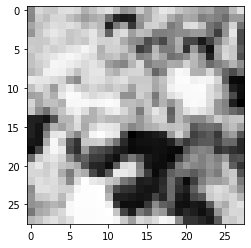

In [11]:
########### suppress warnings ######
import warnings                   ##
warnings.filterwarnings('ignore') ##
####################################
img_array = imageio.imread("people784.png", as_gray = True) # read file ignore rgb, only gray scale
img_data0 = 255.0 - img_array.reshape(784) 
img_data0 = ((img_data0/255.0)*0.99) + 0.01
matplotlib.pyplot.imshow(numpy.asfarray(img_data0).reshape((28,28)),cmap = 'Greys') # construct a graphic object #
matplotlib.pyplot.show() # show the graphic object to a window #
matplotlib.pyplot.close('all')

Now render the cat image in reduced resolution about 1/2 of the original -- still  recognizable for us humans

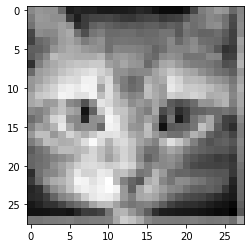

In [12]:
img_array = imageio.imread("cat784.png", as_gray = True)
img_data1 = 255.0 - img_array.reshape(784)
img_data1 = ((img_data1/255.0)*0.99) + 0.01
matplotlib.pyplot.imshow(numpy.asfarray(img_data1).reshape((28,28)),cmap = 'Greys') # construct a graphic object #
matplotlib.pyplot.show() # show the graphic object to a window #
matplotlib.pyplot.close('all')

Now render the tree image in reduced resolution about 1/3 of the original -- still  recognizable for us humans

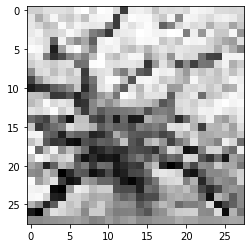

In [13]:
img_array = imageio.imread("tree784.png", as_gray = True)
img_data2 = 255.0 - img_array.reshape(784)
img_data2 = ((img_data2/255.0)*0.99) + 0.01
matplotlib.pyplot.imshow(numpy.asfarray(img_data2).reshape((28,28)),cmap = 'Greys') # construct a graphic object #
matplotlib.pyplot.show() # show the graphic object to a window #
matplotlib.pyplot.close('all')

In [14]:
print("people784 statistics : ",img_data0.mean(),img_data0.var())
print("cat784 statistics : ",img_data1.mean(),img_data1.var())
print("tree784 statistics : ",img_data2.mean(),img_data2.var())

people784 statistics :  0.48325375 0.06275265
cat784 statistics :  0.60355407 0.023282547
tree784 statistics :  0.484061 0.049499817


Using the image statistics, which is just the gray-scale value of each pixel (0-255), we see that the images are different with this simple metric but not by much

    Image       Mean           Variance
    People    0.48325375     0.06275265
    Cat       0.60355407     0.023282547
    Tree      0.484061       0.049499817
    
If we used just a statistical description, in the mean people and tree are the same, whereas a cat is different. But not all cats will have the same mean (or variance).  So simplistic numerical descriptors are useless, we need more that a couple of metrics for the image perhaps higher moments, or a way to consider all pixels at once -- sort of like a regression model. 

We humans naturally fill in missing information and can classify very fast  -- cognative scientists think (now thats a pun!) that our mind performs "regressions" on the whole image and reduces it to a set of classifiers then these are compared in our brain to historical results and the classification that throw off the most dopamine (our brain's drug of choice) is selected.  It happens fast because the chemical reactions involved can be processed in parallel, the message is sent evreywhere at once and the molecules themselves don't even have to arrive for the classification to occur.

Anyway the whole process of taking inputs and determining which category or class it belongs is called classification.

##

## A Simple Classification Machine

Recall our kilometers to miles prediction engine.  That simple machine is a **predicton model**, because it takes an input and makes a prediction of what the output should be. We refined that prediction by adjusting an internal parameter, informed by the error we saw when comparing with a known-true example.

Now look at the following graph showing the measured widths and lengths of garden bugs. 

![](http://54.243.252.9/engr-1330-webroot/1-Lessons/Lesson22/ladybugs.png)

You can clearly see two groups. The caterpillars are thin and long, and the ladybugs are wide and short. Remember the predictor that tried to work out the correct number of miles given kilometres? That predictor had an adjustable linear function at it’s heart. Remember, linear functions give straight lines when you plot their output against input. The adjustable parameter **c** changed the slope of that straight line.



What happens if we place a straight line over that plot? 

![](http://54.243.252.9/engr-1330-webroot/1-Lessons/Lesson22/bugslope1.png)

We can’t use the line in the same way we did before - to convert one number (kilometres) into another (miles), but perhaps we can use the line to separate different kinds of things. In the plot above, if the line was dividing the caterpillars from the ladybirds, then it could be used to **classify** an unknown bug based on its measurements. The line above doesn’t do this yet because half the caterpillars are on the same side of the dividing line as the ladybirds. Let’s try a different line, by adjusting the slope again, and see what happens.

![](http://54.243.252.9/engr-1330-webroot/1-Lessons/Lesson22/bugslope2.png)

This time the line is even less useful! It doesn’t separate the two kinds of bugs at all. Let’s have another go:

![](http://54.243.252.9/engr-1330-webroot/1-Lessons/Lesson22/bugslope3.png)

That’s much better! This line neatly separates caterpillars from ladybirds. We can now use this line as a **classifier** of bugs. We are assuming that there are no other kinds of bugs *that we haven’t seen* - but that’s ok for now, we’re simply trying to illustrate the idea of a simple classifier. 

:::{note}
>Recall the discussion about humans seeing a critter for the first time.  They cannot necessarily classifi it into the exact type of critter, but know it is a critter.  We could even place it into a taxonomy chart based on enough specific characteristics.
> ![](taxonomicChart.png)
and maybe determine what the critter is.  But consider a [platypus](https://en.wikipedia.org/wiki/Platypus) which has four limbs (quadraped), fur, is a mammal, but has bird-like bill, and lays eggs.  If you have never seen one before, the best you could do is classify as varmit or critter.
:::

![]()Imagine next time our computer used a robot arm to pick up a new bug and measured its width and height, it could then use the above line to classify it correctly as a caterpillar or a ladybird. Look at the following plot, you can see the unknown bug is a caterpillar because it lies above the line. This classification is simple but pretty powerful already!

![](http://54.243.252.9/engr-1330-webroot/1-Lessons/Lesson22/newbug.png)

We’ve seen how a linear function inside our simple predictors can be used to classify previously unseen data. But we’ve skipped over a crucial element. How do we get the right slope? How do we improve a line we know isn’t a good divider between the two kinds of bugs? The answer to that is again at the very heart of how machines learn, and we’ll look at this next.


### Training A Simple Classifier

We want to **train** our linear classifier to correctly classify bugs as ladybirds or caterpillars. We saw above this is simply about refining the slope of the dividing line that separates the two groups of points on a plot of big width and height.

How do we do this? We need some examples to learn from. The following truth-table shows two examples, just to keep this exercise simple. 

:::{note}
The moniker *truth-table* is **my** jargon for observations that have been labeled as belonging to a particular class.  In fact this labeling (or coding in the medical industry) is a vital step in supervised learning and is what the human has to provide.  When you have to deal with one of these:<br>
![](captcha.png)<br>
You are part of a Turing test, but are also providing training labels for the images for future use.
:::



|Example| Width| Length| Bug |
|:---|:---|:---|:---|
|1 | 3.0 | 1.0 | ladybird |
|2 | 1.0 | 3.0 | caterpillar |

We have an example of a bug which has width 3.0 and length 1.0, which we know is a ladybird. We also have an example of a bug which is longer at 3.0 and thinner at 1.0, which is a caterpillar. This is a set of examples which we declare to be the truth. 

It is these examples which will help refine the slope of the classifier function. Examples of truth used to teach a predictor or a classifier are called the **training data.**
Let’s plot these two training data examples. Visualising data is often very helpful to get a better understand of it, a feel for it, which isn’t easy to get just by looking at a list or table of numbers.

![](http://54.243.252.9/engr-1330-webroot/1-Lessons/Lesson22/trainingbugs.png)

Let’s start with a random dividing line, just to get started somewhere. Looking back at our miles to kilometre predictor, we had a linear function whose parameter we adjusted. We can do the same here, because the dividing line is a straight line: $y = Ax+b$ 

We’ve deliberately used the names $y$ and $x$ instead of length and width, because strictly speaking, the line is not a predictor here. It doesn’t convert width to length, like we previously converted miles to kilometres. Instead, it is a dividing line, a classifier. To keep the garden bug scenario as simple as possible we will choose a zero intercept $b=0$. 

We saw before that the parameter $A$ controls the slope of the line. The larger $A$ is the larger the slope. Let’s go for $A$ is 0.25 to get started. The dividing line is $y = 0.25x$. Let’s plot this line on the same plot of training data to see what it looks like: 

![](http://54.243.252.9/engr-1330-webroot/1-Lessons/Lesson22/classyline1.png)

Well, we can see that the line $y = 0.25x$ isn’t a good classifier already without the need to do any calculations. The line doesn’t divide the two types of bug - We can’t say “if the bug is above the line then it is a caterpillar” because the ladybird is above the line too.

So intuitively we need to move the line up a bit. We’ll resist the temptation to do this by looking at the plot and drawing a suitable line. We want to see if we can find a repeatable recipe to do this, a series of computer instructions, which computer scientists call an **algorithm**. 

:::{note}
In our ML jargon, **algorithm** and **learner** are synonyms; recipe is a good analogy. Anastasia's good friend *reptition* shows up yet again too!
:::

In [12]:
# Simple Classifier Example
# UNMODERATED LEARNING 

dataframe1 = [[3,1,'L'],[1,3,'C']] # a list of truth table values, L = ladybug, C = cat a pillar
# seperator line hypothesis
def yAx(a,x): # produce a y-value to test for seperation
    yAx = a*x
    return(yAx)

# Hyperparameters
margin = 1.1 #seperation margin as fraction of exact answer
howclose = 1e-4
# Initial Guess - 1st Training Example
a=0.25

ymodel = yAx(a,dataframe1[0][0]) #note the adressing structure - we are sending the 1st training row [0],the first column[0]
error = margin*dataframe1[0][1] - ymodel

# Update a
deltaA = error/dataframe1[0][0]
print(ymodel,error,deltaA)
if abs(error) <= howclose:
    print('error smaller than tolerance, next training row')

# Next Guess - 1st Training Example
a=a+deltaA
ymodel = yAx(a,dataframe1[0][0]) #note the adressing structure - we are sending the 1st training row [0],the first column[0]
error = margin*dataframe1[0][1] - ymodel
deltaA = error/dataframe1[0][0]
print(ymodel,error,deltaA)
if abs(error) <= howclose:
    print('error smaller than tolerance, next training row')

# Initial Guess - 2nd Training Example
a=a+deltaA
ymodel = yAx(a,dataframe1[1][0]) #note the adressing structure - we are sending the 1st training row [0],the first column[0]
error = margin*dataframe1[1][1] - ymodel
deltaA = error/dataframe1[1][0]
print(ymodel,error,deltaA)
if abs(error) <= howclose:
    print('error smaller than tolerance, next training row')

# Next Guess - 2nd Training Example
a=a+deltaA
ymodel = yAx(a,dataframe1[1][0]) #note the adressing structure - we are sending the 1st training row [0],the first column[0]
error = margin*dataframe1[1][1] - ymodel
deltaA = error/dataframe1[1][0]
print(ymodel,error,deltaA)
if abs(error) <= howclose:
    print('error smaller than tolerance, next training row')

0.75 0.3500000000000001 0.1166666666666667
1.1 0.0 0.0
error smaller than tolerance, next training row
0.3666666666666667 2.9333333333333336 2.9333333333333336
3.3000000000000003 0.0 0.0
error smaller than tolerance, next training row


Let’s look at the first training example: the width is 3.0 and length is 1.0 for a ladybird. 
If we tested the $y = Ax$ function with this example where $x$ is 3.0, we’d get $y = (0.25) * (3.0) = 0.75$ 
The function, with the parameter $A$ set to the initial arbitrary chosen value of 0.25, is suggesting that for a bug of width 3.0, the length should be 0.75. 
We know that’s too small because the training data example tells us it must be a length of 1.0. So we have a difference, an **error**. 
Just as before, with the miles to kilometres predictor, we can use this error to inform how we adjust the parameter $A$. But let’s think about what $y$ should be again. 
If $y$ was 1.0 then the line goes right through the point where the ladybird sits at $(x,y) = (3.0, 1.0)$. 
It’s a subtle point but we don’t actually want that. 
We want the line to go above that point. 
Why? Because we want all the ladybird points to be below the line, not on it. 
The line needs to be a *dividing line* between ladybirds and caterpillars, not a predictor of a bug’s length given its width. 
So let’s try to aim for $y = 1.1$ when $x = 3.0$. 
It’s just a small number above 1.0, We could have chosen 1.2, or even 1.3, but we don’t want a larger number like 10 or 100 because that would make it more likely that the line goes above both ladybirds and caterpillars, resulting in a separator that wasn’t useful at all. So the desired target is 1.1, and the error **E** is 

    error = (desired target - actual output)

Which is, $E = 1.1 - 0.75 = 0.35$ 

Let’s examine the error, the desired target and the calculated value visually.

![](http://54.243.252.9/engr-1330-webroot/1-Lessons/Lesson22/visualbugs.png)

Now, what do we do with this **E** to guide us to a better refined parameter $A$? 

We want to use the error in $y$, which we call **E**, to inform the required change in parameter $A$. 
To do this we need to know how the two are related. How is $A$ related to **E**?

If we know this, then we can understand how changing one affects the other (correlation anyone?). 

Let’s start with the linear function for the classifier: $y = Ax$ 
We know that for initial guesses of $A$ this gives the wrong answer for $y$, which should be the value given by the training data. 
Let’s call the correct desired value, $t$ for target value. To get that value $t$, we need to adjust $A$ by a small amount; $ t = (A + \Delta A)x$ Let’s picture this to make it easier to understand. You can see the new slope $(A + \Delta A)$.

![](http://54.243.252.9/engr-1330-webroot/1-Lessons/Lesson22/deltaA.png)

Remember the error **E** was the difference between the desired correct value and the one we calculate based on our current guess for $A$. That is, **E** was $t - y$ (Kind of smells like a residual!);

$$ t - y = (A + \Delta A)x - Ax$$

Expanding out the terms and simplifying: 

$$ \textbf{E} = t - y = (Ax + \Delta A)x - Ax =  E = (\Delta A)x $$

That’s remarkable! The error **E** is related to $\Delta A$ in a very simple way. 

We wanted to know how much to adjust $A$ by to improve the slope of the line so it is a better classifier, being informed by the error **E**. 
To do this we simply re-arrange that last equation: $\Delta A = \textbf{E}/ x$
That’s the magic expression we’ve been looking for. We can use the error **E** to refine the slope $A$ of the classifying line by an amount  $\Delta A$. 

Let’s update that initial slope. The error was 0.35 and the $x$ was 3.0. 
That gives $\Delta A = \textbf{E}/ x$ as 0.35/ 3.0 = 0.1167. 
That means we need to change the current $A = 0.25$ by $0.1167$. 
That means the new improved value for $A$ is (A​ + ΔA​) which is 0.25 + 0.1167 = 0.3667. As it happens, the calculated value of $y$ with this new $A$ is 1.1 as you’d expect - it’s the desired target value. 

Now we have a method for refining that parameter $A$, informed by the current error. Now we’re done with one training example, let’s learn from the next one. Here we have a known true pairing of $x$ = 1.0 and $y$ = 3.0. Let’s see what happens when we put $x$ = 1.0 into the linear function which is now using the updated $A$ = 0.3667. We get $y$ = 0.3667 * 1.0 = 0.3667. 
That’s not very close to the training example with $y$ = 3.0 at all. 

Using the same reasoning as before that we want the line to not cross the training data but instead be just above or below it, we can set the desired target value at 2.9. This way the training example of a caterpillar is just above the line, not on it. The error E​ is (2.9 ­ 0.3667) = 2.5333. That’s a bigger error than before, but if you think about it, all we’ve had so far for the linear function to learn from is a single training example, which clearly biases the line towards that single example. 

Let’s update the $A$ again, just like we did before. The $\Delta A$ is $\textbf{E}/x$ which is 2.5333/ 1.0 = 2.5333. That means the even newer $A$ is 0.3667 + 2.5333 = 2.9. That means for $x = 1.0$ the function gives 2.9 as the answer, which is what the desired value was.

![](http://54.243.252.9/engr-1330-webroot/1-Lessons/Lesson22/someupdates.png)

The  plot shows the initial line, the line updated after learning from the first training example, and the final line after learning from the second training example. 

Looking at that plot, we don’t seem to have improved the slope in the way we had hoped. It hasn’t divided neatly the region between ladybirds and caterpillars. 
The line updates to give each desired value for y. 
If we keep doing this, updating for each training data example, all we get is that the final update simply matches the last training example closely. We might as well have not bothered with all previous training examples. In effect we are throwing away any learning that previous training examples might gives us and just learning from the last one. How do we fix this?

Easy! And this is an important idea in machine learning.**We moderate** the updates. That is, we calm them down a bit. Instead of jumping enthusiastically to each new $A$, we take a fraction of the change $\Delta A$, not all of it. This way we move in the direction that the training example suggests, but do so slightly cautiously, keeping some of the previous value which was arrived at through potentially many previous training iterations. We saw this idea of moderating our refinements before - with the simpler miles to kilometres predictor, where we nudged the parameter **c** as a fraction of the actual error. 

This moderation, has another very powerful and useful side effect. When the training data itself can’t be trusted to be perfectly true, and contains errors or noise, both of which are normal in real world measurements, the moderation can dampen the impact of those errors or noise. It smooths them out. Ok let’s rerun that again, but this time we’ll add a moderation into the update formula: $\Delta A = L (E/ x)$

The moderating factor is often called a **learning rate**, and we’ve called it $L$. Let’s pick $L$ = 0.5 as a reasonable fraction just to get started. It simply means we only update half as much as would have done without moderation. 

Running through that all again, we have an initial $A$ = 0.25. The first training example gives us y = 0.25 * 3.0 = 0.75. A desired value of 1.1 gives us an error of 0.35. The $\Delta A = L (E/ x)$ = 0.5 * 0.35/ 3.0 = 0.0583. The updated $A$ is 0.25 + 0.0583 = 0.3083. 

Trying out this new A on the training example at $x$ = 3.0 gives y​ = 0.3083 * 3.0 = 0.9250. The line now falls on the wrong side of the training example because it is below 1.1 but it’s not a bad result if you consider it a first refinement step of many to come. It did move in the right direction away from the initial line. 

Let’s press on to the second training data example at $x$ = 1.0. Using $A$ = 0.3083 we have y = 0.3083 * 1.0 = 0.3083. The desired value was 2.9 so the error is (2.9 * 0.3083) = 2.5917. The $\Delta A = L (E/ x)$ = 0.5 * 2.5917/ 1.0 = 1.2958. The even newer $A$ is now 0.3083 + 1.2958 = 1.6042. Let’s visualise again the initial, improved and final line to see if moderating updates leads to a better dividing line between ladybird and caterpillar regions.

![](http://54.243.252.9/engr-1330-webroot/1-Lessons/Lesson22/moderatedUpdates.png)

This is really good! Even with these two simple training examples, and a relatively simple update method using a moderating **learning rate**, we have very rapidly arrived at a good dividing line $y = Ax$ where $A$ is 1.6042. Let’s not diminish what we’ve achieved. We’ve achieved an automated method of learning to classify from examples that is remarkably effective given the simplicity of the approach.

In [29]:
# Simple Classifier Example
# MODERATED LEARNING 
# SEQUENCE AND SELECTION

dataframe1 = [[3,1,'L'],[1,3,'C']] # a list of truth table values, L = ladybug, C = cat a pillar
# seperator line hypothesis
def yAx(a,x): # produce a y-value to test for seperation
    yAx = a*x
    return(yAx)

# Hyperparameters

learningrate = 0.5
howclose = 1e-4

# Initial Guess - 1st Training Example
a=0.25

ymodel = yAx(a,dataframe1[0][0]) #note the adressing structure - we are sending the 1st training row [0],the first column[0]
error = 0.1+dataframe1[0][1] - ymodel

# Update a
deltaA = learningrate*(error/dataframe1[0][0])
print('Initial Guess 1st Training Set')
print('Target value = ',round(error+ymodel,3))
print(' Model value = ',round(ymodel,3))
print(' Error value = ',round(error,3))
print(' Slope value = ',round(a,3))
if abs(error) <= howclose:
    print('error smaller than tolerance, next training row')

# Next Guess - 1st Training Example
a=a+deltaA

ymodel = yAx(a,dataframe1[0][0]) #note the adressing structure - we are sending the 1st training row [0],the first column[0]
error = 0.1+dataframe1[0][1] - ymodel
deltaA = learningrate*(error/dataframe1[0][0])
print('Updated Guess 1st Training Set')
print('Target value = ',round(error+ymodel,3))
print(' Model value = ',round(ymodel,3))
print(' Error value = ',round(error,3))
print(' Slope value = ',round(a,3))
if abs(error) <= howclose:
    print('error smaller than tolerance, next training row')

# Initial Guess - 2nd Training Example
#a=a+deltaA

ymodel = yAx(a,dataframe1[1][0]) #note the adressing structure - we are sending the 1st training row [0],the first column[0]
error = (-0.1)+dataframe1[1][1] - ymodel
deltaA = learningrate*(error/dataframe1[1][0])
print('Initial Guess 2nd Training Set')
print('Target value = ',round(error+ymodel,3))
print(' Model value = ',round(ymodel,3))
print(' Error value = ',round(error,3))
print(' Slope value = ',round(a,3))
if abs(error) <= howclose:
    print('error smaller than tolerance, next training row')

# Next Guess - 2nd Training Example
a=a+deltaA

ymodel = yAx(a,dataframe1[1][0]) #note the adressing structure - we are sending the 1st training row [0],the first column[0]
error = (-0.1)+dataframe1[1][1] - ymodel
deltaA = learningrate*(error/dataframe1[1][0])
print('Update Guess 2nd Training Set')
print('Target value = ',round(error+ymodel,3))
print(' Model value = ',round(ymodel,3))
print(' Error value = ',round(error,3))
print(' Slope value = ',round(a,3))
if abs(error) <= howclose:
    print('error smaller than tolerance, next training row')

Initial Guess 1st Training Set
Target value =  1.1
 Model value =  0.75
 Error value =  0.35
 Slope value =  0.25
Updated Guess 1st Training Set
Target value =  1.1
 Model value =  0.925
 Error value =  0.175
 Slope value =  0.308
Initial Guess 2nd Training Set
Target value =  2.9
 Model value =  0.308
 Error value =  2.592
 Slope value =  0.308
Update Guess 2nd Training Set
Target value =  2.9
 Model value =  1.604
 Error value =  1.296
 Slope value =  1.604


Now to try to get to a limit based on our pre-selected tolerance

In [44]:
# Simple Classifier Example
# MODERATED LEARNING 
# SEQUENCE, SELECTION, AND REPETITION

dataframe1 = [[3,1,'L'],[1,3,'C']] # a list of truth table values, L = ladybug, C = cat a pillar
# seperator line hypothesis
def yAx(a,x): # produce a y-value to test for seperation
    yAx = a*x
    return(yAx)

# Hyperparameters
howmany = 2
learningrate = 0.5
howclose = 1e-3

# Wrap the updates into a repetition structure
a = 0.25

deltaA = 0.0 # initial value 
for iguess in range(howmany):
# Next Guess - 1st Training Example
    a=a+deltaA
    ymodel = yAx(a,dataframe1[0][0]) #note the adressing structure - we are sending the 1st training row [0],the first column[0]
    error = 0.1+dataframe1[0][1] - ymodel
    deltaA = learningrate*(error/dataframe1[0][0])
    print('Updated Guess 1st Training Set')
    print('Trial Count  = ',iguess)
    print('Target value = ',round(error+ymodel,3))
    print(' Model value = ',round(ymodel,3))
    print(' Error value = ',round(error,3))
    print(' Slope value = ',round(a,3))
    if abs(error) <= howclose:
        print('error smaller than tolerance, next training row')
        break
        
deltaA = 0.0
for iguess in range(howmany):
# Next Guess - 2nd Training Example
    a=a+deltaA
    ymodel = yAx(a,dataframe1[1][0]) #note the adressing structure - we are sending the 1st training row [0],the first column[0]
    error = (-0.1)+dataframe1[1][1] - ymodel
    deltaA = learningrate*(error/dataframe1[1][0])
    print('Update Guess 2nd Training Set')
    print('Trial Count  = ',iguess)
    print('Target value = ',round(error+ymodel,3))
    print(' Model value = ',round(ymodel,3))
    print(' Error value = ',round(error,3))
    print(' Slope value = ',round(a,3))
    if abs(error) <= howclose:
        print('error smaller than tolerance, next training row')
        break

Updated Guess 1st Training Set
Trial Count  =  0
Target value =  1.1
 Model value =  0.75
 Error value =  0.35
 Slope value =  0.25
Updated Guess 1st Training Set
Trial Count  =  1
Target value =  1.1
 Model value =  0.925
 Error value =  0.175
 Slope value =  0.308
Update Guess 2nd Training Set
Trial Count  =  0
Target value =  2.9
 Model value =  0.308
 Error value =  2.592
 Slope value =  0.308
Update Guess 2nd Training Set
Trial Count  =  1
Target value =  2.9
 Model value =  1.604
 Error value =  1.296
 Slope value =  1.604


In [59]:
# Simple Classifier Example
# MODERATED LEARNING 
# SEQUENCE, SELECTION, AND REPETITION 

dataframe1 = [[3,1,'L'],[1,3,'C']] # a list of truth table values, L = ladybug, C = cat a pillar
# seperator line hypothesis
def yAx(a,x): # produce a y-value to test for seperation
    yAx = a*x
    return(yAx)

def offset(string): # note multiple returns
    if string == 'L':
        offset=0.1
        return(offset)
    if string == 'C':
        offset=-0.1
        return(offset)
    else: 
        raise Exception('input not string')

# Hyperparameters
howmanytrials = 18
howmanytests = 2
learningrate = 0.5
howclose = 1e-3

# Wrap the updates into a repetition structure
a = 0.25

for iset in range(howmanytests):
    deltaA = 0.0 # initial value 
    for iguess in range(howmanytrials):
# Next Guess - iset Training Example
        a=a+deltaA
        ymodel = yAx(a,dataframe1[iset][0]) #note the adressing structure - we are sending the 1st training row [0],the first column[0]
        nudge = offset(dataframe1[iset][2]) #use the truth table to offset the seperator
        error = nudge+dataframe1[iset][1] - ymodel
        deltaA = learningrate*(error/dataframe1[iset][0])
        #print('Updated Guess Training Set',iset+1)
        #print('Trial Count  = ',iguess+1)
        #print('Target value = ',round(error+ymodel,3))
        #print(' Model value = ',round(ymodel,3))
        #print(' Error value = ',round(error,3))
        #print(' Slope value = ',round(a,3))
        if abs(error) <= howclose:
            print('error smaller than tolerance, next training row')
            print('Updated Guess Training Set',iset+1)
            print('Trial Count  = ',iguess+1)
            print('Target value = ',round(error+ymodel,3))
            print(' Model value = ',round(ymodel,3))
            print(' Error value = ',round(error,3))
            print(' Slope value = ',round(a,3))
            break

error smaller than tolerance, next training row
Updated Guess Training Set 1
Trial Count  =  10
Target value =  1.1
 Model value =  1.099
 Error value =  0.001
 Slope value =  0.366
error smaller than tolerance, next training row
Updated Guess Training Set 2
Trial Count  =  13
Target value =  2.9
 Model value =  2.899
 Error value =  0.001
 Slope value =  2.899


So now we have evolved our example into a fairly automated process to identify slopes that can discriminate between ladybirds and catapillars based on some measurements, kind of like papayas for instance.  Here we only had a sample size of two, and if we needed to use the classifier we would need an interface to take inputs, width and length. Then for a given width apply the two "models" to determine if

- ladybird
- catapillar
- not ladybird, not catapillar (the whole wedge between the two slopes, assuming we saved the two slopes)

Clearly on the right track but not quite finished.

## Learning Theory Concepts
Im just going to grow this list each chapter - maybe someday it will all come together.

- *Learning in the limit* Given a continuous stream of examples where the learner predicts whether each one is a member of the concept or not and is then is told the correct answer, does the learner eventually converge to a correct concept and never make a mistake again.  One can think of this as if the learner has a big enough training set, then it eventually can achieve a "perfect" fit.  I am extrapolating a bit, but the idea is that in the limit perfection is achievable.

- By simple *enumeration* (what I called Grid Search), concepts from any known finite hypothesis space are learnable in the limit, although typically requires an exponential (or doubly exponential) number of examples and time.

Definitions:

- *Hypothesis* is a structural representation of predictor response relationship; $r=f(p)$
- *Model* is a **fitted** hypothesis. For instance $f(p) = \beta_1 p^{beta_2}$ where $\beta_1$ and $\beta_2$ have been determined by application of a learner (i.e. they are known); $\beta_1$ and $\beta_2$ are **parameters** of the model (at least after fitting).  So all we do is supply predictor values and get a response.
- *Learner* is an algorithm that fits a hypothesis to produce a data model.
- *Moderator* or *Learning Rate* is a **hyperparameter** that controls the learning process.  It has to be set by the supervisor (human) to guide the learner and is not learnable from the data.

Learners:

- *Consistent Learner* A learner L using a hypothesis H and training data D is said to be a consistent learner if it always outputs a **model** with zero error on D whenever H contains such a hypothesis. By definition, a consistent learner must produce a **model** in the version space for H given D. 

- *Halving learner* I cannot find a simple translation, its the name given to a concept where the learner splits the training data space into a partion that produces *crappy models* and a partition that produces *good models* or even *consistent* models (using above definition).  I think the concept refers to the entire hypothesis,training,model process; obviously the ability to split the predictor space into the parts that are effective and not will be quite useful.  

- *Ellipsoid learner* Refers to a classification algorithm that searches an n-dimensional ellipsoid in the training domain to determine a classification scheme.

## References
1. Chan, Jamie. Machine Learning With Python For Beginners: A Step-By-Step Guide with Hands-On Projects (Learn Coding Fast with Hands-On Project Book 7) (p. 2). Kindle Edition. 
2. [Rashid, Tariq. Make Your Own Neural Network](https://www.goodreads.com/en/book/show/29746976-make-your-own-neural-network) 